# Huge Stock Market Dataset

In this notebook will be performed:
1. Importing Libraries
2. Preprocessing
3. Tesla Stock Market Analyis
4. Tesla ARIMA (AutoRegressive Integrated Moving Average) Time Series Prediction
5. Microsoft Stock Market Analyis
6. Microsoft ARIMA (AutoRegressive Integrated Moving Average) Time Series Prediction

# Importing Libraries

In [49]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from subprocess import check_output
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from pandas.plotting import lag_plot
import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [50]:
warnings.filterwarnings('ignore')

# Tesla Stock Market Analyis

In [51]:
df = pd.read_csv(r"C:/Users/one1t/OneDrive/Desktop/HighPrep_ZeltaAuto/Datasets/ETH/ETHUSDT_1d.csv")

df.rename(columns={
    'datetime': 'Date',
    'open': 'Open',
    'high': 'High',
    'low': 'Low',
    'close': 'Close',
    'volume': 'Volume'
}, inplace=True)

df.head()

,Unnamed: 0,Date,Open,High,Low,Close,Volume
0,0,2019-12-01,151.38,152.50,145.50,150.65,394494.119
1,1,2019-12-02,150.72,151.30,146.67,148.59,395630.910
2,2,2019-12-03,148.59,149.80,145.62,147.10,495996.573
3,3,2019-12-04,147.12,152.22,142.96,145.35,684404.817
4,4,2019-12-05,145.36,148.88,143.77,148.04,441113.912


In [52]:
print(df.head())
print(df.shape)
print(df.columns)

   Unnamed: 0        Date    Open    High     Low   Close      Volume
0           0  2019-12-01  151.38  152.50  145.50  150.65  394494.119
1           1  2019-12-02  150.72  151.30  146.67  148.59  395630.910
2           2  2019-12-03  148.59  149.80  145.62  147.10  495996.573
3           3  2019-12-04  147.12  152.22  142.96  145.35  684404.817
4           4  2019-12-05  145.36  148.88  143.77  148.04  441113.912
(1493, 7)
Index(['Unnamed: 0', 'Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')


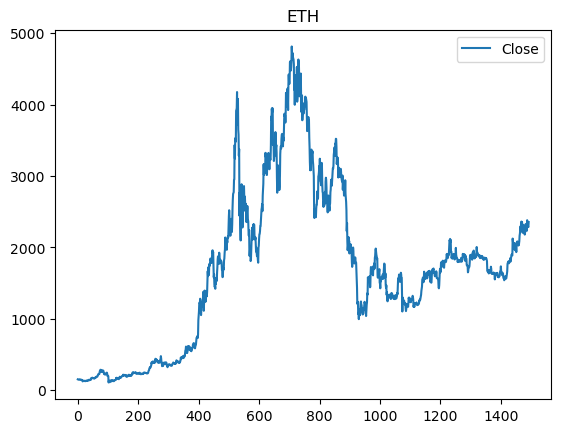

In [53]:
df[['Close']].plot()
plt.title("ETH")
plt.show()

Text(0.5, 1.0, 'ETH Cumulative Returns')

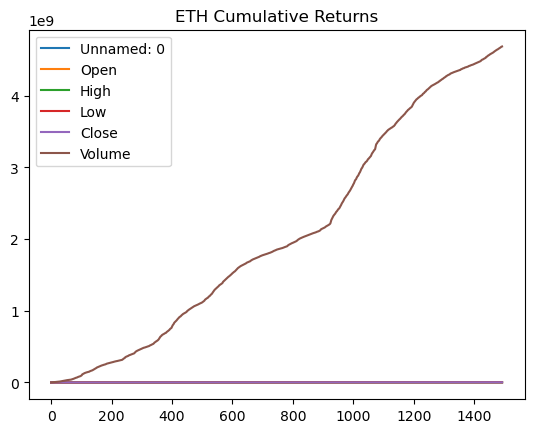

In [54]:
# Comulative Return
dr = df.cumsum()
dr.plot()
plt.title('ETH Cumulative Returns')

Text(0.5, 1.0, 'ETH Autocorrelation plot')

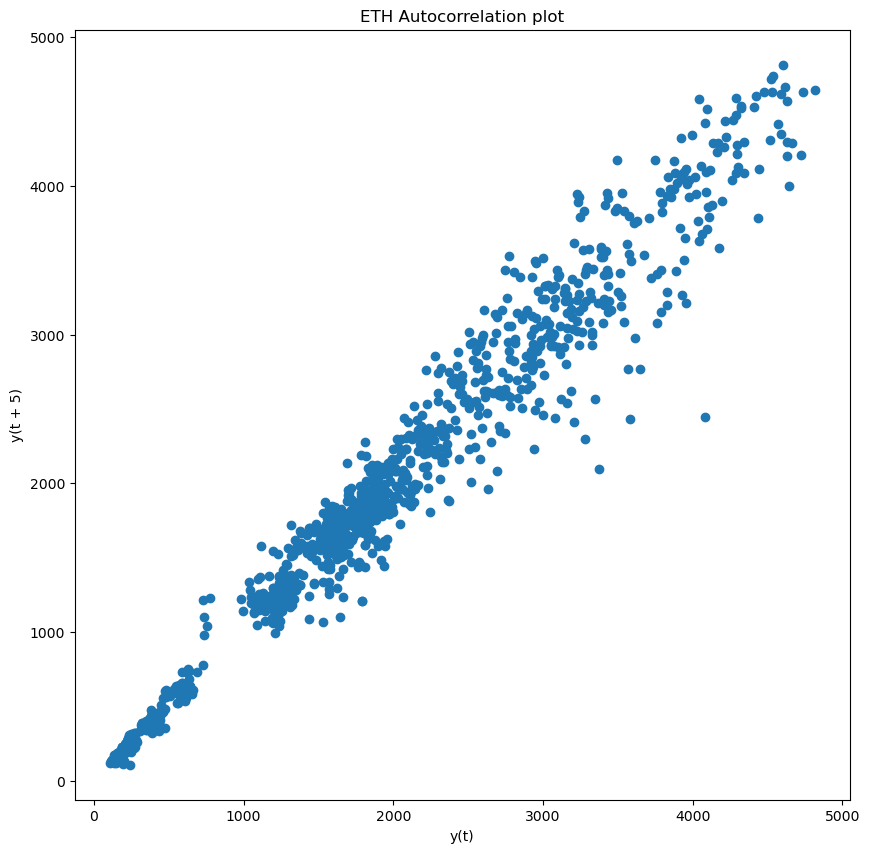

In [55]:
plt.figure(figsize=(10,10))
lag_plot(df['Open'], lag=5)
plt.title('ETH Autocorrelation plot')

## ARIMA (AutoRegressive Integrated Moving Average) for Time Series Prediction

In [56]:
df['Date'][1000]

'2022-08-27'

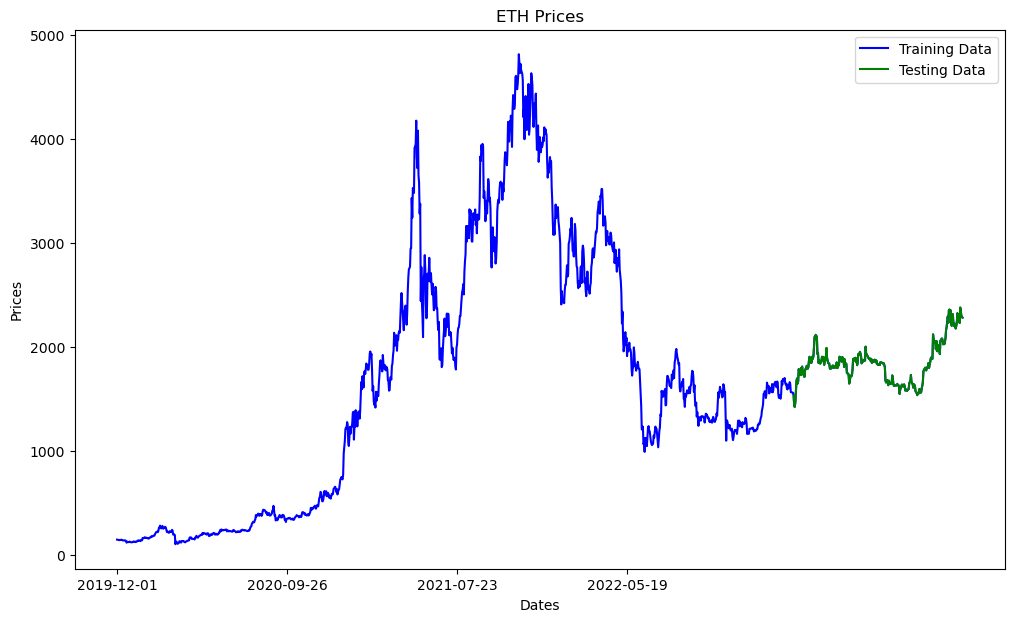

In [57]:
train_data, test_data = df[0:int(len(df)*0.8)], df[int(len(df)*0.8):]
plt.figure(figsize=(12,7))
plt.title('ETH Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(df['Open'], 'blue', label='Training Data')
plt.plot(test_data['Open'], 'green', label='Testing Data')
plt.xticks(np.arange(0,1000, 300), df['Date'][0:1000:300])
plt.legend()

In [58]:
def smape_kun(y_true, y_pred):
    return np.mean((np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) + np.abs(y_true))))

In [59]:
from statsmodels.tsa.arima.model import ARIMA

In [60]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Assuming train_data and test_data are defined and contain the 'Open' column
train_ar = train_data['Open'].values
test_ar = test_data['Open'].values

# History is a list of the training data values
history = [x for x in train_ar]
print(type(history))  # Should print <class 'list'>

predictions = list()
for t in range(len(test_ar)):
    # Fit the ARIMA model on the history data
    model = ARIMA(history, order=(5, 1, 0))
    model_fit = model.fit()  # No disp=0 argument here
    
    # Make a forecast for the next time step
    output = model_fit.forecast(steps=1)
    yhat = output[0]  # The forecasted value for this step
    predictions.append(yhat)
    
    # Add the actual observation from test data to history
    obs = test_ar[t]
    history.append(obs)

    # Optionally, print predicted vs expected values
    # print(f'Predicted={yhat}, Expected={obs}')

# Calculate mean squared error
error = mean_squared_error(test_ar, predictions)
print(f'Testing Mean Squared Error: {error:.3f}')

# Assuming smape_kun is defined elsewhere, calculate SMAPE
error2 = smape_kun(test_ar, predictions)
print(f'Symmetric Mean Absolute Percentage Error: {error2:.3f}')


<class 'list'>
Testing Mean Squared Error: 2016.503
Symmetric Mean Absolute Percentage Error: 1.647


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Assuming train_data and test_data are defined and contain the 'Open' column
train_ar = train_data['Open'].values
test_ar = test_data['Open'].values

# History is a list of the training data values
history = [x for x in train_ar]
print(type(history))  # Should print <class 'list'>

predictions = list()
for t in range(len(test_ar)):
    # Fit the ARIMA model on the history data
    model = ARIMA(history, order=(1, 1, 0))
    model_fit = model.fit()  # Fit the model without disp argument
    
    # Forecast the next 10 steps (days) ahead
    output = model_fit.forecast(steps=1)
    # Append the predicted 10-day forecast
    predictions.extend(output)  # Add all 10 forecasted values to predictions list
    
    # Add the actual observation from test data to history (to update the model)
    obs = test_ar[t]
    history.append(obs)

# Since predictions contain multiple forecasts for each point, we need to cut it down to the same length as test_ar
predictions = predictions[:len(test_ar)]

# Calculate mean squared error
error = mean_squared_error(test_ar, predictions)
print(f'Testing Mean Squared Error: {error:.3f}')

# Assuming smape_kun is defined elsewhere, calculate SMAPE
error2 = smape_kun(test_ar, predictions)
print(f'Symmetric Mean Absolute Percentage Error: {error2:.3f}')


<class 'list'>
Testing Mean Squared Error: 60547.848
Symmetric Mean Absolute Percentage Error: 11.191


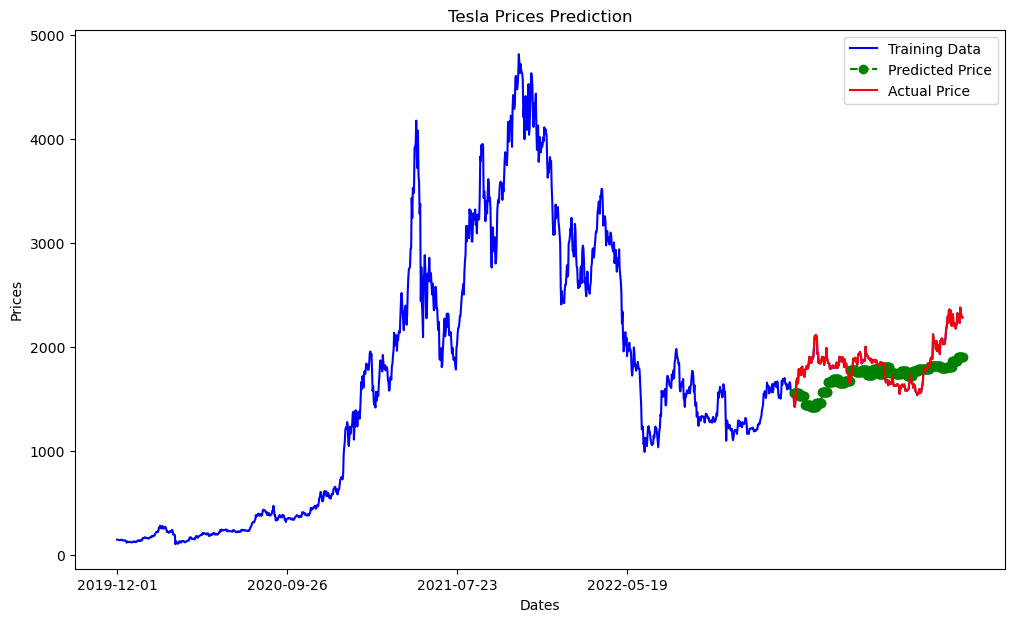

In [63]:
plt.figure(figsize=(12,7))
plt.plot(df['Open'], 'green', color='blue', label='Training Data')
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(test_data.index, test_data['Open'], color='red', label='Actual Price')
plt.title('Tesla Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.xticks(np.arange(0,1000, 300), df['Date'][0:1000:300])
plt.legend()

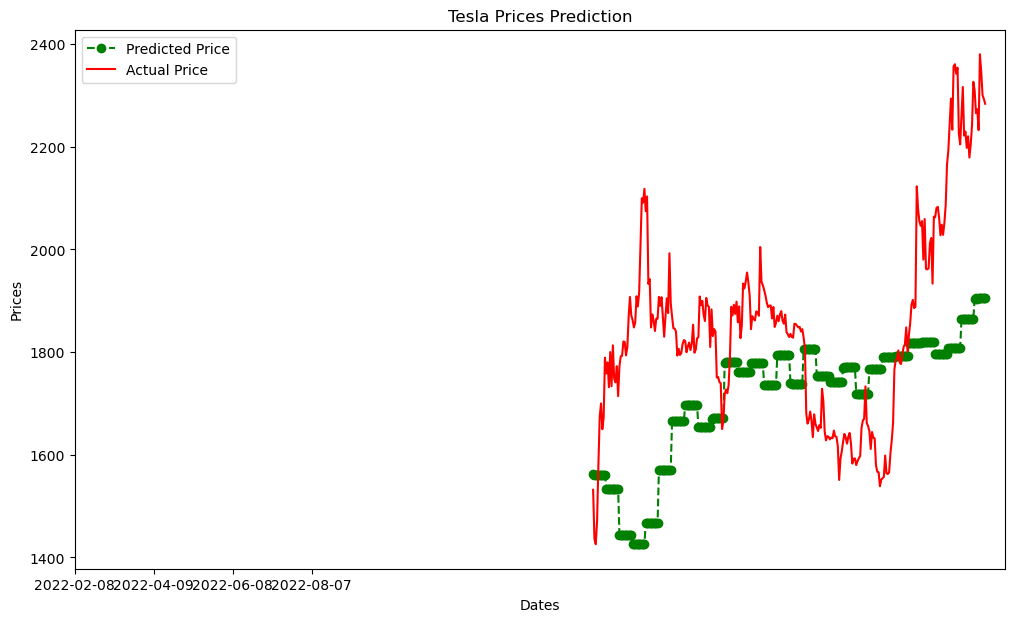

In [64]:
plt.figure(figsize=(12,7))
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(test_data.index, test_data['Open'], color='red', label='Actual Price')
plt.xticks(np.arange(800,1000, 60), df['Date'][800:1000:60])
plt.title('Tesla Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()